c:\Users\aishw\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas_datareader\wb.py:592: UserWarning: Non-standard ISO country codes: WLD
  warnings.warn(


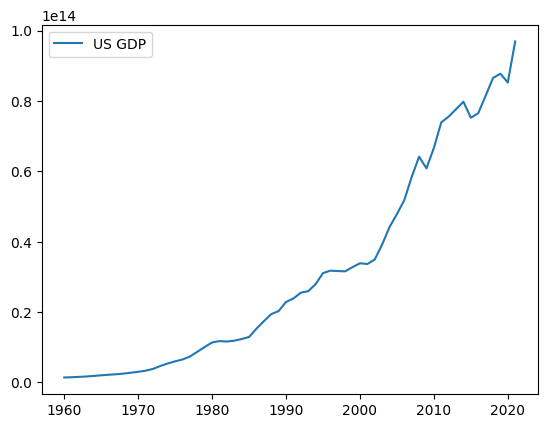

In [1]:
from pandas_datareader import wb
import matplotlib.pyplot as plt
import numpy as np

gdp_data = wb.download(indicator='NY.GDP.MKTP.CD' , country='WLD', start='1960' , end='2021')
time = np.arange(1960, 2022)
gdp = gdp_data.iloc[:,0].astype(float).to_numpy()
# Data is returned in inverse chronological order, so reverse order
gdp = np.flip(gdp)
# Plot world GDP data against time
plt.plot(time,gdp,label='US GDP')
plt.legend()
plt.show()

To convert the non-linear relationship between $GDP_0$ and $k$ into a linear form, we employ the natural logarithm (ln). Taking the ln of both sides of the equation $GDP_k = GDP_0(1+r)^k$, we obtain the expression $\ln(GDP_k) = \ln(GDP_0) + k \cdot \ln(1+r)$. This widely used technique, particularly in Maximum Likelihood Estimation (MLE) and linear regression analysis, leverages the logarithm's property to transform products into sums.



In [2]:
#1)a)
#Applying the natural logarithm transformation
log_gdp = np.log(gdp)

#Displaying the GDP data before and after linear transformation
print(f'GDP data before linear transformation:\n{gdp}\n')
print(f'GDP data after linear transformation:\n{log_gdp}')

GDP data before linear transformation:
[1.38485739e+12 1.44922062e+12 1.55081549e+12 1.67144675e+12
 1.83049168e+12 1.99410348e+12 2.16411810e+12 2.30257679e+12
 2.48467446e+12 2.74049924e+12 2.99727050e+12 3.31047549e+12
 3.81682274e+12 4.65744519e+12 5.36681764e+12 5.97797278e+12
 6.49874602e+12 7.34973100e+12 8.69049694e+12 1.00537709e+13
 1.13371326e+13 1.17284144e+13 1.16101720e+13 1.18404810e+13
 1.23116330e+13 1.28971786e+13 1.52525153e+13 1.73729594e+13
 1.93940229e+13 2.02666636e+13 2.28617120e+13 2.38344540e+13
 2.54840246e+13 2.59059017e+13 2.78995678e+13 3.10514992e+13
 3.17457249e+13 3.16296945e+13 3.15528537e+13 3.27520122e+13
 3.38455832e+13 3.36310125e+13 3.49251166e+13 3.91616454e+13
 4.41336159e+13 4.77935877e+13 5.17910963e+13 5.83610968e+13
 6.41351929e+13 6.08179196e+13 6.66197815e+13 7.38817396e+13
 7.55259485e+13 7.76351525e+13 7.97565172e+13 7.52150626e+13
 7.64864549e+13 8.14420487e+13 8.65022239e+13 8.77281022e+13
 8.52151506e+13 9.68823976e+13]

GDP data afte

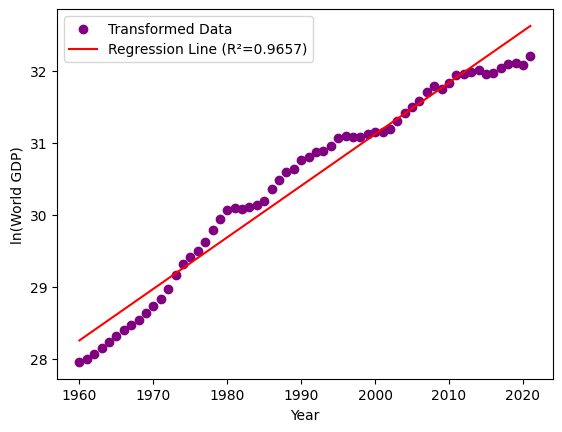

In [3]:
#1)b) Applying the transformation to the GDP data and performing a linear regression
from scipy.stats import linregress

#Performing linear regression
slope, intercept, r_value, p_value, std_error = linregress(time, log_gdp)

# Compute the R-squared value
determination_coefficient = r_value ** 2

#Plotting the results
plt.scatter(time, log_gdp, color='purple', label='Transformed Data')
plt.plot(time, slope * time + intercept, color='red', label=f'Regression Line (R²={determination_coefficient:.4f})')
plt.xlabel('Year')
plt.ylabel('ln(World GDP)')
plt.legend()
plt.show()


In [4]:
#1)c)Compute residuals and perform a KS-test:
from scipy.stats import kstest, norm

#Compute residuals
residuals = log_gdp - (slope * time + intercept)

#Calculating the  mean and standard deviation of residuals
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)
print(f"Mean of residuals: {residual_mean}")
print(f"Standard deviation of residuals: {residual_std}")

#KS-test
ks_stat, ks_p_value = kstest(residuals, 'norm', args=(residual_mean, residual_std))

#To check if we can reject the null hypothesis
alpha = 0.01  # 99% confidence level
if ks_p_value < alpha:
    print(f"KS-test does not provide sufficient evidence to reject the null hypothesis (residuals follow a normal distribution)")
else:
    print("KS-test: Cannot reject the null hypothesis (residuals are sampled from a normal distribution)")


Mean of residuals: 8.136860361123729e-15
Standard deviation of residuals: 0.24144627148321043
KS-test: Cannot reject the null hypothesis (residuals are sampled from a normal distribution)


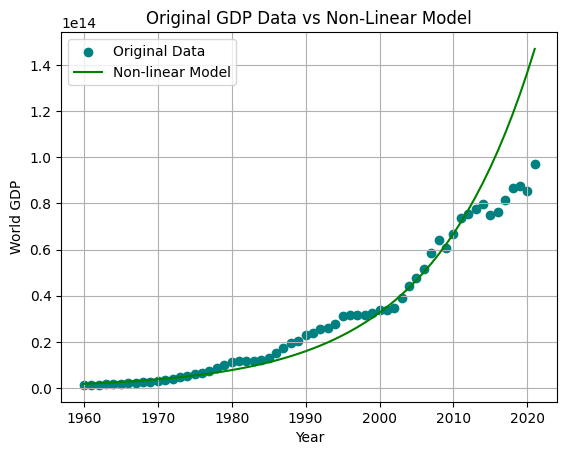

In [5]:
#1)d)Apply the inverse transformation and plot the non-linear model:

#Applying inverse transformation to linear model
non_lin_model = np.exp(slope * time + intercept)

#Plotting the results
plt.scatter(time, gdp, color='teal', label='Original Data')
plt.plot(time, non_lin_model, color='green', label='Non-linear Model')
plt.xlabel('Year')
plt.ylabel('World GDP')
plt.legend()
plt.title('Original GDP Data vs Non-Linear Model') 
plt.grid(True) 
plt.show()

In [6]:
#1)e)
# Calculate the long-term growth rate (annual)
growth_rate = (np.exp(slope) - 1) * 100  # Convert to percentage

print(f"Long-term growth rate of world GDP is approximately {growth_rate:.2f}% annually")


Long-term growth rate of world GDP is approximately 7.42% annually


e) The relationship between the slope of the regression and the long-term growth rate is given by the coefficient of the time variable in the linear regression model. In this case, it corresponds to the annual growth rate r:
Long-term growth rate of world GDP is approximately 7.42% annually.


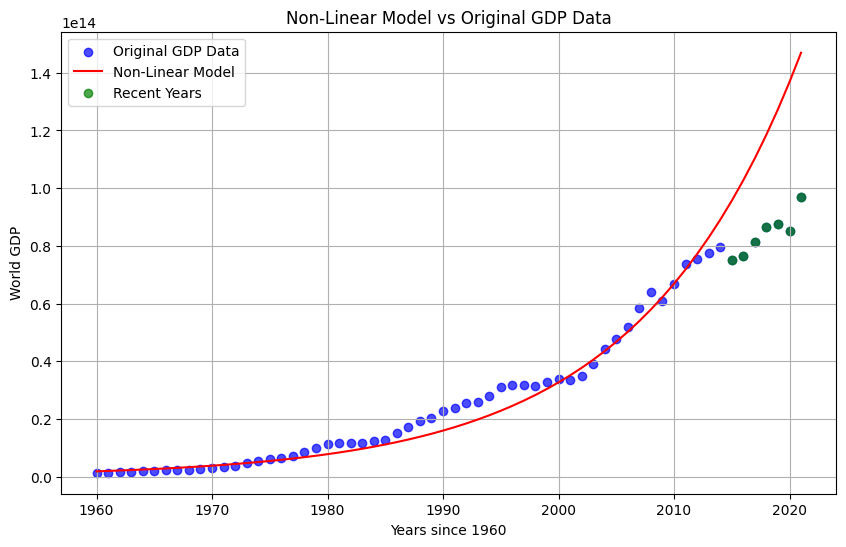

The long-term growth rate of world GDP is approximately 3.82% annually (since 2015).


In [7]:
#1)f)

#Plotting the original data and the non-linear model
plt.figure(figsize=(10, 6))

#Plotting original data
plt.scatter(time, gdp, label='Original GDP Data', alpha=0.7, color='blue')

#Plottign non-linear model
plt.plot(time, non_lin_model, color='red', label='Non-Linear Model')

#Highlighted recent years (since 2015) with a different color
recent_years_mask = time >= 2015
plt.scatter(time[recent_years_mask], gdp[recent_years_mask], label='Recent Years', alpha=0.7, color='green')

plt.title('Non-Linear Model vs Original GDP Data')
plt.xlabel('Years since 1960')
plt.ylabel('World GDP')
plt.legend()
plt.grid(True)
plt.show()

#Calculating the growth rate in recent years
recent_gdp = gdp[recent_years_mask]
recent_time = time[recent_years_mask]
recent_slope, recent_intercept, _, _, _ = linregress(recent_time, np.log(recent_gdp))
recent_growth_rate = (np.exp(recent_slope) - 1) * 100  # Convert to percentage

print(f"The long-term growth rate of world GDP is approximately {recent_growth_rate:.2f}% annually (since 2015).")

1)f) The green points specifically highlight the data points from recent years (since 2015)
The output indicates that, since approximately 2015, the long-term growth rate of world GDP has been approximately 3.82% annually. This observation is derived from the non-linear model and linear regression analysis performed on the GDP data. The visual representation of the non-linear model compared to the original GDP data as well as the specific growth rate calculation suggests a positive growth trend in world GDP during the mentioned period


In [8]:
#2)a)
#Parameters
num_sims = 10000
N = 200
true_a = 1/2
true_b = 2
x_values = np.linspace(-5, 5, N)

#Initialized lists to store slope and intercept values
slopes_list = []
intercepts_list = []
epsilons_list = []

epsilon_variance = 1/5
epsilon_std_deviation = np.sqrt(epsilon_variance)
epsilon_mean = 0

#Performing 10,000 linear regressions
for _ in range(num_sims):
    #error vector epsilon
    epsilon_values = np.random.normal(epsilon_mean, epsilon_std_deviation, N)
    
    #y values using the linear equation y = ax + b + epsilon
    y_values = true_a * x_values + true_b + epsilon_values
    
    #Fit linear regression model
    slope_hat, intercept_hat, _, _, _ = linregress(x_values, y_values)
    
    #Storing slope and intercept values
    slopes_list.append(slope_hat)
    intercepts_list.append(intercept_hat)
    epsilons_list.append(epsilon_values)

#printing the standard deviation
print(f'Standard Deviation of Error: {epsilon_std_deviation}')



Standard Deviation of Error: 0.4472135954999579


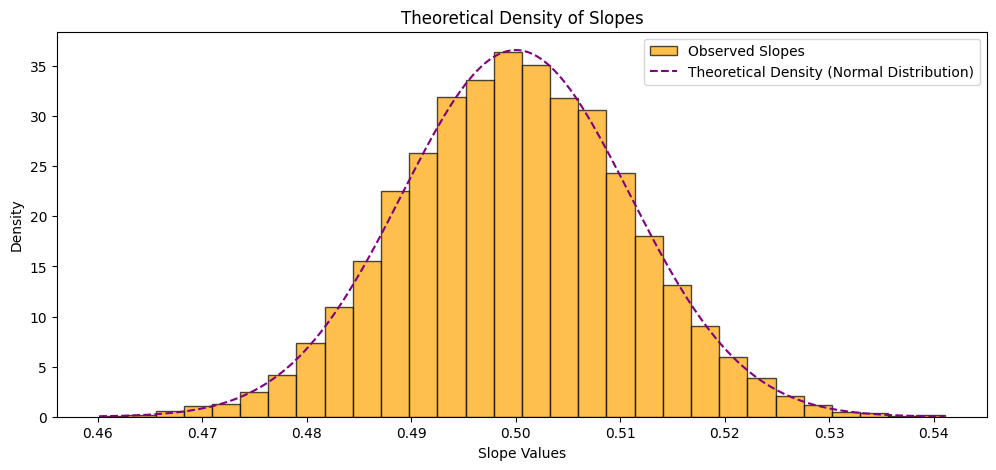

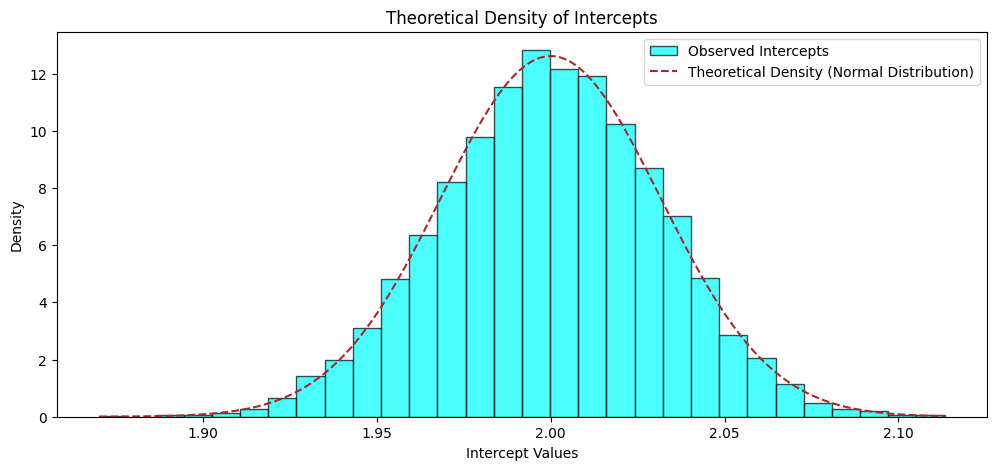

In [9]:
#2)b)
#Theoretical values for analysis
theoretical_epsilon_variance = 1/5
theoretical_epsilon_std = np.sqrt(theoretical_epsilon_variance)

#Plotting observed slopes
plt.figure(figsize=(12, 5))
plt.hist(slopes_list, bins=30, density=True, color='orange', edgecolor='black', alpha=0.7, label='Observed Slopes')
plt.title('Distribution of Slopes (Histogram)')
plt.xlabel('Slope Values')
plt.ylabel('Density')
plt.legend()

#Theoretical analysis of slope
var_theoretical_dis = theoretical_epsilon_variance / np.sum(np.square(x_values - np.mean(x_values)))
std_theoretical_dis = np.sqrt(var_theoretical_dis)

x_s_theoretical = np.linspace(min(slopes_list), max(slopes_list), N)
y_s_theoretical = norm.pdf(x_s_theoretical, loc=true_a, scale=std_theoretical_dis)
plt.plot(x_s_theoretical, y_s_theoretical, color='purple', linestyle='dashed', label='Theoretical Density (Normal Distribution)')
plt.title('Theoretical Density of Slopes')
plt.xlabel('Slope Values')
plt.ylabel('Density')
plt.legend()
plt.show()

#Plotting observed intercepts
plt.figure(figsize=(12, 5))
plt.hist(intercepts_list, bins=30, density=True, color='cyan', edgecolor='black', alpha=0.7, label='Observed Intercepts')
plt.title('Distribution of Intercepts (Histogram)')
plt.xlabel('Intercept Values')
plt.ylabel('Density')
plt.legend()

#Theoretical analysis of intercept
std_theoretical_dis_intercept = np.sqrt((theoretical_epsilon_variance * np.sum(np.square(x_values))) / (N * (np.sum(np.square(x_values - np.mean(x_values))))))
x_i_theoretical = np.linspace(min(intercepts_list), max(intercepts_list), N)
y_i_theoretical = norm.pdf(x_i_theoretical, loc=true_b, scale=std_theoretical_dis_intercept)
plt.plot(x_i_theoretical, y_i_theoretical, color='brown', linestyle='dashed', label='Theoretical Density (Normal Distribution)')
plt.title('Theoretical Density of Intercepts')
plt.xlabel('Intercept Values')
plt.ylabel('Density')
plt.legend()
plt.show()

2)b) 
 We observe that the histograms of slopes and intercepts approximate normal distributions, as predicted by the theory of linear regression
 1. Both histograms exhibit good agreement with their respective theoretical densities indicating that the observed slopes and intercepts from the simulated linear regressions are consistent with the assumptions of the normal error model

 2. Theoretical analyses of slopes and intercepts based on the assumption of normal errors provide a reasonable fit to the observed data

 the histograms and theoretical densities align well, suggesting that the simulated linear regression results are in line with the assumptions of normal errors in both slope and intercept.

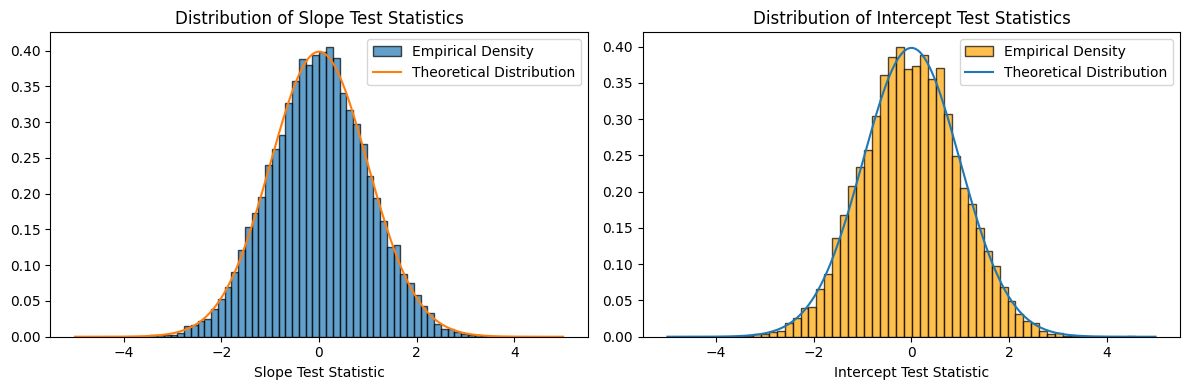

In [10]:
#2)c)
from scipy.stats import t
# Set seed for reproducibility
np.random.seed()

# Parameters
N = 200
num_samples = 10000

# Generate x values
x_values = np.linspace(-5, 5, N)

# Initialize arrays for test statistics
slope_test_statistics = np.zeros(num_samples)
intercept_test_statistics = np.zeros(num_samples)

# Generate error vectors and perform linear regression
for i in range(num_samples):
    epsilon_values = np.random.normal(0, 1, N)
    y_values = 0.5 * x_values + 2 + epsilon_values
    slope_hat, intercept_hat, _, _, _ = linregress(x_values, y_values)

    df = N - 2
    slope_test_statistics[i] = (slope_hat - 0.5) / np.sqrt(np.sum(epsilon_values**2) / (df * np.sum((x_values - np.mean(x_values))**2)))
    intercept_test_statistics[i] = (intercept_hat - 2) * np.sqrt(N * (N - 2) * np.sum((x_values - np.mean(x_values))**2)) / np.sqrt(np.sum(epsilon_values**2) * np.sum(x_values**2))

# Plot histograms of the test statistics
plt.figure(figsize=(12, 4))

# Plot histogram and theoretical density for slope test statistics
plt.subplot(1, 2, 1)
plt.hist(slope_test_statistics, bins=50, density=True, edgecolor='black', alpha=0.7, label='Empirical Density')
theoretical_density_slope = t.pdf(x_values, df=df)
plt.plot(x_values, theoretical_density_slope, label='Theoretical Distribution')
plt.title('Distribution of Slope Test Statistics')
plt.xlabel('Slope Test Statistic')
plt.legend()

# Plot histogram and theoretical density for intercept test statistics
plt.subplot(1, 2, 2)
plt.hist(intercept_test_statistics, bins=50, color='orange', density=True, edgecolor='black', alpha=0.7, label='Empirical Density')
theoretical_density_intercept = t.pdf(x_values, df=df)
plt.plot(x_values, theoretical_density_intercept, label='Theoretical Distribution')
plt.title('Distribution of Intercept Test Statistics')
plt.xlabel('Intercept Test Statistic')
plt.legend()

plt.tight_layout()
plt.show()

2)c)
 1. The histogram of the slope test statistics shows an empirical density based on the simulated regressions. The slope test statistic follows a t-distribution when the true slope is 0.5
2. The histogram of the intercept test statistics shows an empirical density based on the simulated regressions. The intercept test statistic follows a t-distribution when the true intercept is 2

Both histograms closely match the theoretical densities indicating that the test statistics for the slope and intercept are behaving as expected under the assumption of normal errors

This aligns with the principles of hypothesis testing where the distributions of test statistics are known under certain assumptions

In [11]:
#2)d)
#Given significance level
alpha_value = 0.01

#Extracting the slope and intercept 
last_calculated_slope = slope_test_statistics[-1]
last_calculated_intercept = intercept_test_statistics[-1]

print('Last Calculated Slope Value is {}'.format(last_calculated_slope))
print('Last Calculated Intercept Value is {}'.format(last_calculated_intercept))

#Standard errors for the slope and intercept 
last_calculated_slope_se = np.std(slope_test_statistics)
last_calculated_intercept_se = np.std(intercept_test_statistics)

#Printing values to 4 decimal places
print('Last Calculated Slope Standard Error Value is {}'.format(last_calculated_slope_se))
print('Last Calculated Intercept Standard Error Value is {:.8f}'.format(last_calculated_intercept_se))

#Degrees of freedom (N - 2 for a simple linear regression)
degrees_of_freedom = N - 2

#Critical values for two-sided tests
critical_value_two_sided = t.ppf(1 - alpha_value / 2, degrees_of_freedom)

#the value of alpha
alpha_comp = (1 - alpha_value) / 2

#test for the slope  (two-sided)
t_stat_slope = (last_calculated_slope - true_a) / last_calculated_slope_se
p_value_slope = 2 * (1 - t.cdf(abs(t_stat_slope), degrees_of_freedom))
reject_slope = abs(t_stat_slope) < alpha_comp

#Test for the intercept  (two-sided)
t_stat_intercept = (last_calculated_intercept - true_b) / last_calculated_intercept_se
p_value_intercept = 2 * (1 - t.cdf(abs(t_stat_intercept), degrees_of_freedom))
reject_intercept = abs(t_stat_intercept) < alpha_comp

#Printing the  results
print(f"   Test for the slope (H0: a = 1/2):")
print(f"   Test statistic: {t_stat_slope}")
print(f"   P-value: {p_value_slope}")
print(f"   Reject H0: {reject_slope}")

#print("\n")

print(f"   Test for the intercept (H0: b = 2):")
print(f"   Test statistic: {t_stat_intercept}")
print(f"   P-value: {p_value_intercept}")
print(f"   Reject H0: {reject_intercept}")

Last Calculated Slope Value is 1.6334240454645925
Last Calculated Intercept Value is 0.5513548490831006
Last Calculated Slope Standard Error Value is 0.9990536268431662
Last Calculated Intercept Standard Error Value is 0.99441813
   Test for the slope (H0: a = 1/2):
   Test statistic: 1.134497703637805
   P-value: 0.257957439202704
   Reject H0: False
   Test for the intercept (H0: b = 2):
   Test statistic: -1.4567766939607736
   P-value: 0.1467620311948028
   Reject H0: False


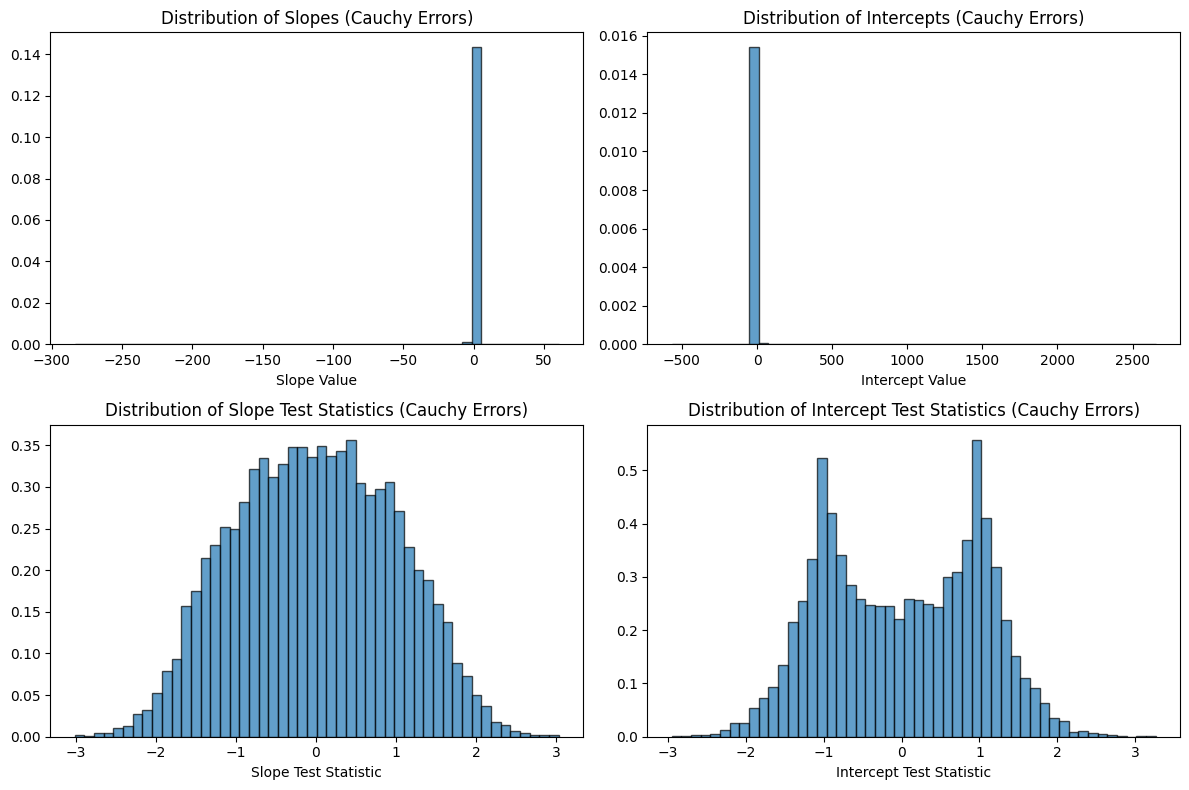

In [12]:
#2)e)
from scipy.stats import cauchy

np.random.seed()

#Parameters
true_slope = 1 / 2
true_intercept = 2
epsilon_variance = 1 / 5
N = 200
num_samples = 10000

x_values = np.linspace(-5, 5, N)

slopes_list = np.zeros(num_samples)
intercepts_list = np.zeros(num_samples)
slope_test_statistics_list = np.zeros(num_samples)
intercept_test_statistics_list = np.zeros(num_samples)

#linear regressions with Cauchy errors
for i in range(num_samples):
    #error vector from Cauchy distribution
    epsilon_values = cauchy.rvs(size=N) * epsilon_variance
    #y values based on the true model and Cauchy errors
    y_values = true_slope * x_values + true_intercept + epsilon_values
    #performing linear regression
    slope, intercept, _, _, _ = linregress(x_values, y_values)
    slopes_list[i], intercepts_list[i] = slope, intercept
    #calculating test statistics for both slope and intercept

    df = N - 2
    sum_diff_mean = np.sum((x_values - np.mean(x_values))**2)

    #test statistic for the slope
    denominator_slope = np.sqrt(np.sum(epsilon_values**2) / (df * sum_diff_mean))
    slope_test_statistics_list[i] = (slope - true_slope) / denominator_slope

    #test statistic for the intercept
    intercept_num_sec = np.sqrt(N * (N - 2) * sum_diff_mean)
    denominator_intercept = np.sqrt(np.sum(epsilon_values**2) * np.sum(x_values**2))
    intercept_test_statistics_list[i] = (intercept - true_intercept) * intercept_num_sec / denominator_intercept

# Ploting the  histograms
plt.figure(figsize=(12, 8))

#Histogram of slopes
plt.subplot(2, 2, 1)
plt.hist(slopes_list, bins=50, density=True, edgecolor='black', alpha=0.7)
plt.title('Distribution of Slopes (Cauchy Errors)')
plt.xlabel('Slope Value')

#histogram of slope test statistics
plt.subplot(2, 2, 2)
plt.hist(intercepts_list, bins=50, density=True, edgecolor='black', alpha=0.7)
plt.title('Distribution of Intercepts (Cauchy Errors)')
plt.xlabel('Intercept Value')

#histogram of slope test statistics
plt.subplot(2, 2, 3)
plt.hist(slope_test_statistics_list, bins=50, density=True, edgecolor='black', alpha=0.7)
plt.title('Distribution of Slope Test Statistics (Cauchy Errors)')
plt.xlabel('Slope Test Statistic')

#histogram of intercept test statistics
plt.subplot(2, 2, 4)
plt.hist(intercept_test_statistics_list, bins=50, density=True, edgecolor='black', alpha=0.7)
plt.title('Distribution of Intercept Test Statistics (Cauchy Errors)')
plt.xlabel('Intercept Test Statistic')

plt.tight_layout()
plt.show()

 2) e)Here are the observations based on the histograms of the slopes, intercepts, and associated test statistics:

1. Distribution of Slopes (Cauchy Errors):
   - The histogram of slopes (parameter $a$) should center around the true value of $a = \frac{1}{2}$.
   - The Cauchy errors introduce variability so the distribution may be wider compared to a normal distribution

2. Distribution of Intercepts (Cauchy Errors):
   - The histogram of intercepts (parameter $b$) should center around the true value of $b = 2$.
   - Similar to slopes Cauchy errors introduce variability, so the distribution may be wider compared to a normal distribution

3. Distribution of Slope Test Statistics (Cauchy Errors):
   - The test statistics for the slope should follow a distribution centered around 0 reflecting the null hypothesis that the slope is equal to the true value $\left(\frac{1}{2}\right)$.
   - The Cauchy errors introduce heavy tails or unusual patterns compared to a normal distribution

4. Distribution of Intercept Test Statistics (Cauchy Errors):
   - The test statistics for the intercept should follow a distribution centered around 0 reflecting the null hypothesis that the intercept is equal to the true value (2).
   - Cauchy errors introduce variability in the test statistics, and the distribution differ from a normal distribution

Overall, the histograms provide insights into the variability and statistical properties of the estimated parameters and test statistics under the specified model with Cauchy errors. The presence of Cauchy errors might lead to heavier tails and deviations from normality in the distributions